# Manifold of Mordred vectors

**Instruction**  
This notebook aims to visualize 2D scatter plot of manifold of Mordred vectors.  
The execution of the following code requires the file `dataset_clean_multilabel_reduced.csv`.  

**Contents**
1. Read dataset and make mordred vectors from SMILES
1. Perform standardization and manifold
1. Visualize 2D scattter plot of the manifold

In [6]:
import pandas as pd
import numpy as np
import umap
from rdkit import Chem
from mordred import Calculator, descriptors
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE,MDS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

In [7]:
def Mol2Mordred(smiles_list, ignore_3D=True):
    if ignore_3D == True:
        calc = Calculator(descriptors, ignore_3D=True)
        mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
        mordred = calc.pandas(mols)
    elif ignore_3D == False:
        calc = Calculator(descriptors, ignore_3D=True)
        mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
        mordred = calc.pandas(mols)
    return mordred

In [8]:
df = pd.read_csv('dataset/dataset_clean_multilabel_reduced.csv', index_col=0)
X = Mol2Mordred(df['SMILES'], ignore_3D=True)
X = X.dropna(axis=1)
X = X.select_dtypes('number')
X = StandardScaler().fit_transform(X)

 23%|████████████████▉                                                         | 47/206 [00:07<09:22,  3.54s/it]

C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\walla

 37%|███████████████████████████▋                                              | 77/206 [00:08<00:07, 17.09it/s]

C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 42%|███████████████████████████████▎                                          | 87/206 [00:09<00:06, 17.30it/s]

C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 53%|██████████████████████████████████████▉                                  | 110/206 [00:11<00:07, 12.55it/s]

C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 69%|██████████████████████████████████████████████████▋                      | 143/206 [00:16<00:08,  7.50it/s]

C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|█████████████████████████████████████████████████████████████████████████| 206/206 [00:27<00:00,  7.51it/s]


C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\wallach2\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\walla

In [9]:
list_color = []
for i in df.iloc[:,1:].values.tolist():
    if i == [1,0,0,0]:
        list_color.append('red')    #thermalPT
    elif i == [0,1,0,0]:
        list_color.append('blue')   #tFE
    elif i == [0,0,1,0]:
        list_color.append('yellow') #tSE
    elif i == [1,1,0,0]:
        list_color.append('green')  #thermalPT & tFE
    elif i == [0,1,1,0]:
        list_color.append('purple') #tFE & tSE
    elif i == [0,0,0,1]:
        list_color.append('orange') #MechanoCM
    elif i == [1,0,1,0]:
        list_color.append('black') #thermalPT & tFE & tSE
    else:
        list_color.append('white')

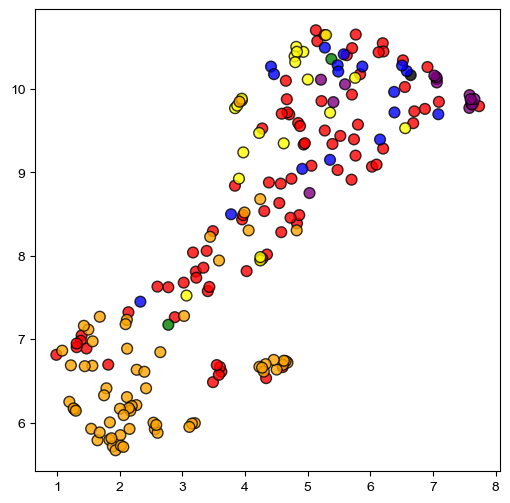

In [11]:
# mani = TSNE(n_components=2, random_state=2)
# mani = MDS(n_components=2, random_state=2)
# mani = PCA(n_components=2)
mani = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=2)
latent = mani.fit_transform(X)
plt.figure(figsize=(6,6))
plt.scatter(latent[:,0], latent[:,1], c=list_color, alpha=0.8, ec='k', s=60)

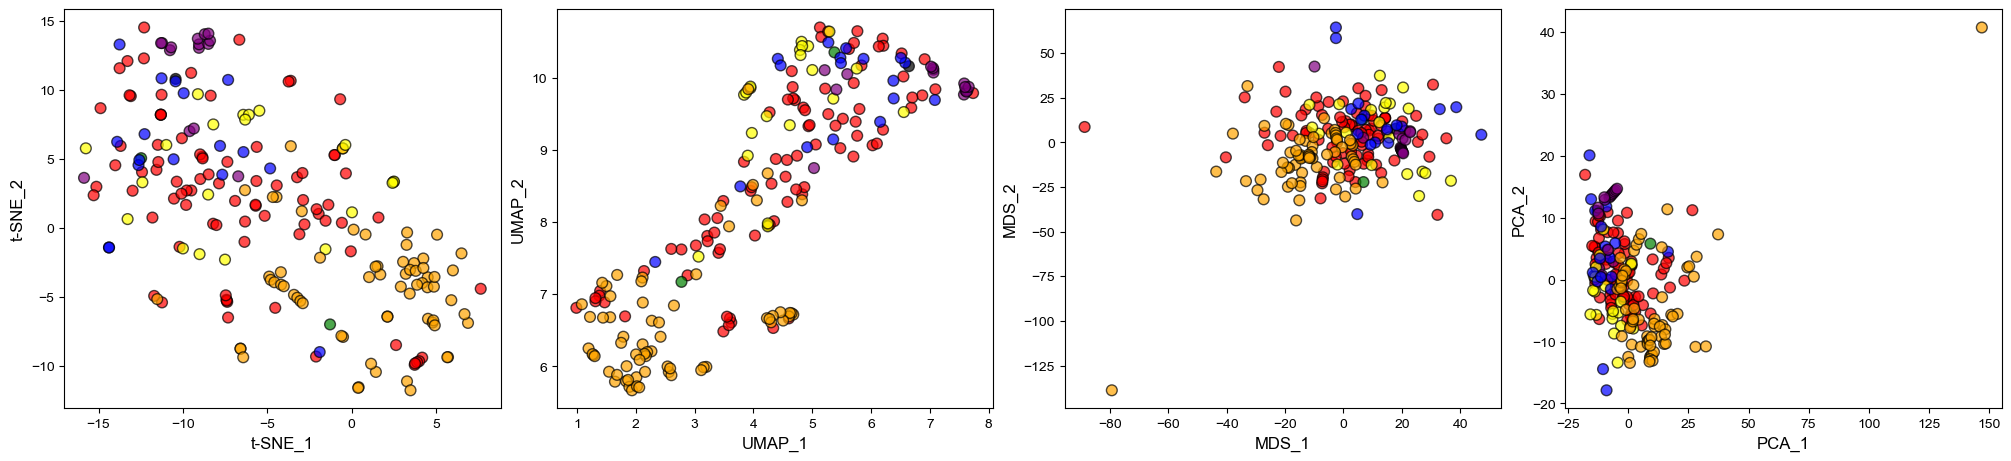

In [13]:
n_components=2
list_mani = [TSNE(n_components=n_components, random_state=2), 
             umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=n_components, random_state=2),
             MDS(n_components=n_components, random_state=2),
             PCA(n_components=n_components)]
labels = ['t-SNE', 'UMAP', 'MDS', 'PCA']
fig = plt.figure(figsize=(20,4.5), constrained_layout=True)
for i in range(len(list_mani)):
    latent = list_mani[i].fit_transform(X)
    ax = fig.add_subplot(1,4,i+1)
    ax.scatter(latent[:,0], latent[:,1], c=list_color, alpha=0.7, ec='k', s=60)
    ax.set_xlabel(f'{labels[i]}_1', fontsize=12)
    ax.set_ylabel(f'{labels[i]}_2', fontsize=12)
# plt.savefig('figs/manifold.png', dpi=300)

(0.0, 10.0)

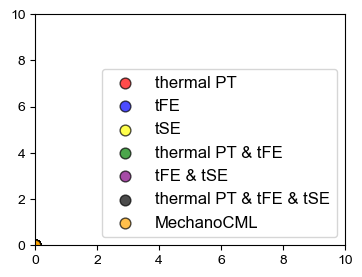

In [16]:
# For legend
legends = ['thermal PT',
           'tFE',
           'tSE',
           'thermal PT & tFE',
           'tFE & tSE',
           'thermal PT & tFE & tSE',
           'MechanoCML',
           ]
colors = ['red', 'blue', 'yellow', 'green', 'purple', 'black', 'orange', ]
arr = np.zeros(len(colors)*2).reshape(-1,2)
plt.figure(figsize=(4,3))
for i in range(len(colors)):
    plt.scatter(arr[:,0],arr[:,1],c=colors[i], label=legends[i], ec='k', alpha=0.7, s=60)
plt.legend(loc=4, fontsize=12)
plt.xlim(0,10)
plt.ylim(0,10)
# plt.savefig('figs/legend.png', dpi=300)